# Domaća zadaća

Ova Jupyter bilježnica je nastala s ciljem rješavanja domaće zadaće iz predmeta Matematički softver. 
Prvotna ideja je bila izraditi bilježnicu sa objašnjenim gradivom iz fizike na temu gibanja, ali se uz to otvorila prilika prikazati i analizu utjecaja prekomjerne vožnje sa smrtnošću u nesreći. Prvi dio zadaće sadrži dio teorije iz fizike, definicije te zadatke, a drugi dio sadrži statističku obradu podataka. 

Paketi koje ću korisiti su:

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import datetime
import pytz
import scipy.stats as stats
import collections
import ipywidgets as widgets

from numpy import sin,linspace
from pylab import plot,show
from IPython.display import HTML,Image
from matplotlib import animation
from mpl_toolkits.basemap import Basemap
from math import sin, cos, sqrt, atan2, radians


# Gibanja

_ϕνζισ_ (grčki) <b>fizika</b> je znanost koja proučava prirodu i prirodne pojave.

<b>Galileo Galilei</b>, talijanski fizičar, matematičar i astronom, prvi je u promatranje pojava u prirodi uveo eksperiment te je umjesto pitanja "zašto" postavljao pitanje "kako" u nekome procesu. 

_"Broji ono što se može brojiti, mjeri ono što se može mjeriti, a što nije mjerljivo, učini mjerljivim."_ (Galileo Galilei)

_"Kada ono o čemu govorite možete izmjeriti i izraziti brojevima, tada znate nešto o tome; kada to ne možete izmjeriti, tada je vaše znanje oskudno i nedovoljno."_(William Thomson, lord Kelvin) 

Počnimo otkrivati zakonitosti koje vladaju u prirodi.

## Mjerenje

Mjerenje je postupak kojim se pri eksperimentalnom istraživanju neke veličine brojčani rezultat i njegova pogreška uspoređuju s utvrđenom jedinicom za tu veličinu.

<b>Primjer 1</b>
Da bismo ispekli kolač, potrebno je pećnicu zagrijati na temperaturu od <b>400°F</b>.
Kako je naša pećnica europska, moramo pretvoriti Fahrenheitove stupnjeve u Celzijeve stupnjeve . 
Učinimo to s pomoću formule za preračunavanje iz Fahrenheitovih stupnjeva u Celzijeve stupnjeve.

$$
\begin{eqnarray}
t(°C)&=&\frac{5}{9}(t(°F)-32)\\
t(°C)&=&\frac{5}{9}(400−32)=204°C\
\end{eqnarray}
$$

Grafički prikažemo ovisnost Fahrenheitovih i Celzijevih stupnjeva

Text(0, 0.5, 'Celzijev')

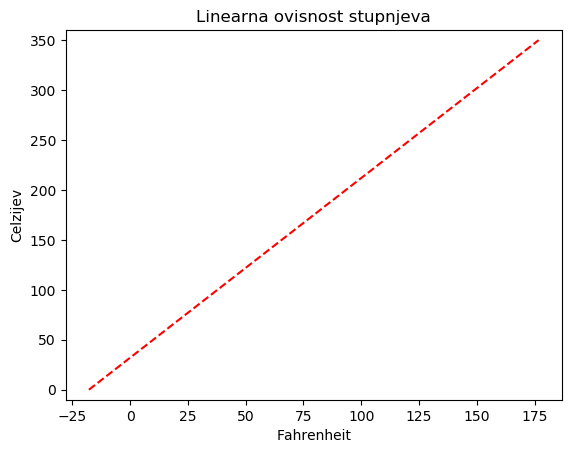

In [126]:
import matplotlib.pyplot as plt
import numpy as np
cel=np.array(range(351))
far=np.zeros(351)
for i in cel:
    far[i]=5/9*(cel[i]-32)
plt.plot(far,cel,'--r')
plt.xlim(min(far)-10,max(far)+10)
plt.ylim(min(cel)-10,max(cel)+10)
plt.title("Linearna ovisnost stupnjeva")
plt.xlabel("Fahrenheit")
plt.ylabel("Celzijev")

## Brzina
<b>Srednja brzina</b> je količnik ukupnog puta prijeđenog u određenome vremenskom intervalu i toga vremenskog intervala. 

$$
\begin{eqnarray}
\bar{v}&=&\frac{\Delta s}{\Delta t}\
\end{eqnarray}
$$
<b>Trenutna brzina</b> je vektorska fizikalna veličina koja opisuje koliko brzo i u kojem se smjeru neko tijelo giba u određenom trenutku. Smjer brzine je tangenta na putanju tijela.


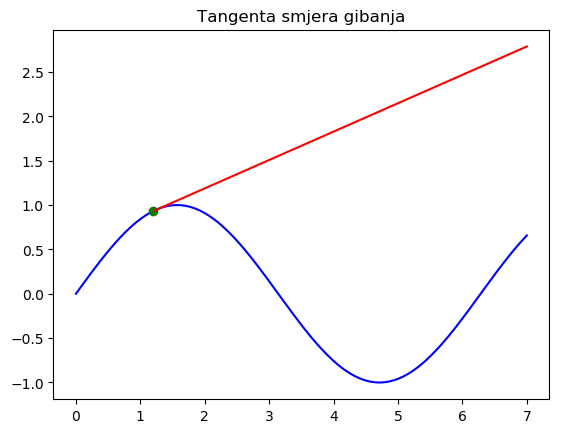

In [129]:
def f(x): # Promatramo gibanje po sinusoidi
 return sin(x)

x = linspace(0,7,150) ## postavljanje x i y
y = f(x)

a = 1.2
h = 0.09
fprime = (f(a+h)-f(a))/h # derivaciju računamo ovako
tan = f(a)+fprime*(x-a)  # tangenta je dana ovom formulom

plt.plot(x,y,'b',a,f(a),'og')
x2=[i for i in x if i >=a]
l=len(x)-len(x2)
plt.plot(x[l:],tan[l:],'-r')
plt.title("Tangenta smjera gibanja")
show()

## Jednoliko pravocrtno gibanje 
Ako pri gibanju tijelo u jednakim vremenskim intervalima prelazi jednak put, tada je brzina stalna. 

In [130]:
fig, ax = plt.subplots()
x1=0
x2=100
y1=0
y2=5
mslopte=20
ax.set_xlabel('Put', fontsize=12)
x_position, = ax.plot([], [], marker='o', markersize=mslopte, color='g')

ax.set_xlim(( x1, x2))
ax.set_ylim((y1, y2))
xos=np.linspace(x1,x2,100)
yos=np.ones(100)
ax.plot(xos,yos,'k')
ax.yaxis.set_visible(False)
ax.set_title("Jednoliko pravocrtno gibanje")

def init():
    x_position.set_data([], [])
    return (x_position,)
def animate(i):
    xp = i
    yp = 1+(mslopte/100+0.05)
    x_position.set_data(xp, yp)
    return (x_position,)
ani =matplotlib.animation.FuncAnimation(fig,  animate, init_func=init,frames=100, interval=20, blit=True)
plt.close()
HTML(ani.to_jshtml())

<b>Primjer 2</b> Automobilu je kapalo ulje iz motora pa je iza njega ostao trag. Kapljice su padale na cestu u jednakim razmacima od desetinke sekunde. Na slici vidimo dio puta gdje su razmaci između mrlja iznosili $1,5m$.

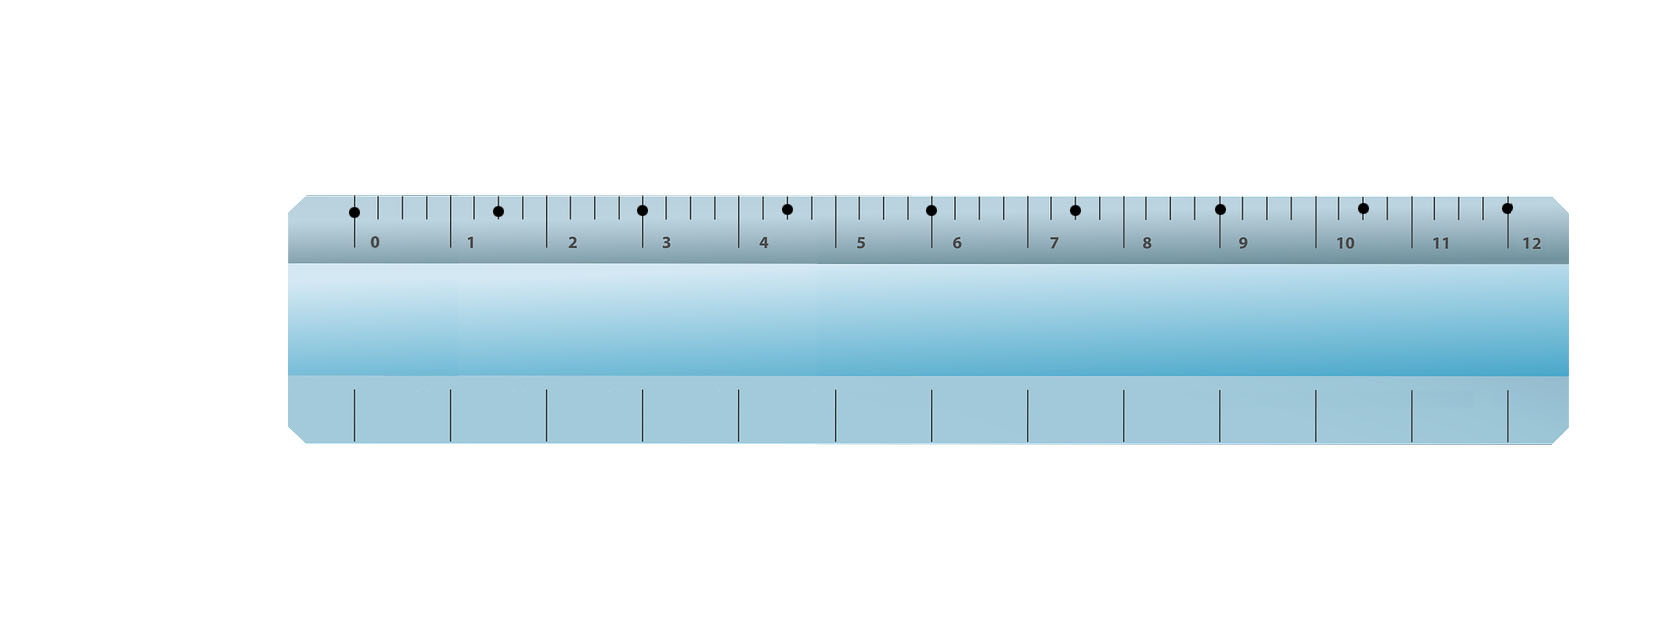

In [131]:
from IPython.display import Image
Image("Primjer 2.jpg")

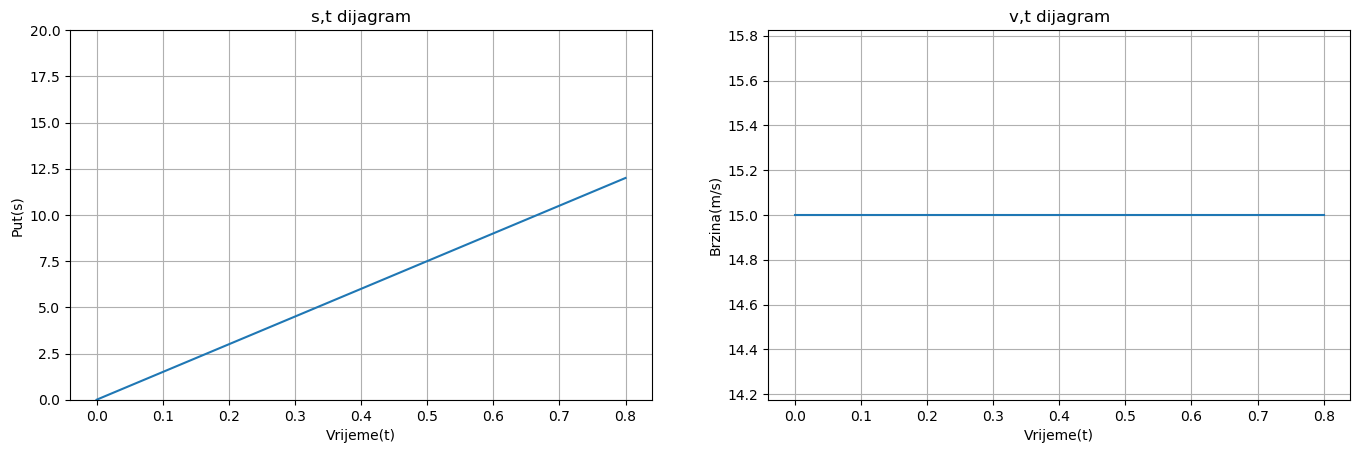

In [132]:
t=np.arange(0.0,0.8+0.1,0.1)
s=np.arange(0,12+1.5,1.5)

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True)
fig.subplots_adjust(left=4, bottom=None, right=6, top=None, wspace=None, hspace=None)
ax1.plot(t, s)
ax1.set(xlabel='Vrijeme(t)', ylabel='Put(s)',
       title='s,t dijagram',ylim=(0,20))
ax1.grid() ##ovo mi pokazuje mrežu 
##Brzina
v=np.zeros(len(t))
for i in range(len(t)-1):
    v[i+1]=np.divide(s[i+1],t[i+1])
v[0]=v[1]
ax2.plot(t, v)
ax2.set(xlabel='Vrijeme(t)', ylabel='Brzina(m/s)',
       title='v,t dijagram')
ax2.grid()
plt.show()

Te vrijednosti su koordinate točaka čijim povezivanjem dobijemo $s,t$ dijagram. Vidimo da je $s,t$ dijagram kosi pravac, a brzina automobila je (matematički rečeno) koeficijent smjera pravca. Odredimo put prijeđen u prve tri desetinke sekunde. Iznos prijeđenog puta možemo izračunati kao površinu lika ispod $v,t$ krivulje u intervalu između točaka $t=0 s$ i $t=0,3 s$.

<b>Zadatak</b>
Avion polazi iz mjesta New York u $20$ sati i $4$ minute i kreće prema Seattle-u na drugoj strani obale. Ako pretpostavimo da se avion giba jendoliko od trenutka polijetanja do trenutka slijetanja brzinom $485 km/h$ koliko će mu vremena biti potrebno da dođe na drugu stranu obale i u koliko sati će sletjeti? Računaj na vremensku razliku od $3$ sata! Udaljenost među gradovima dobivamo preko karte.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


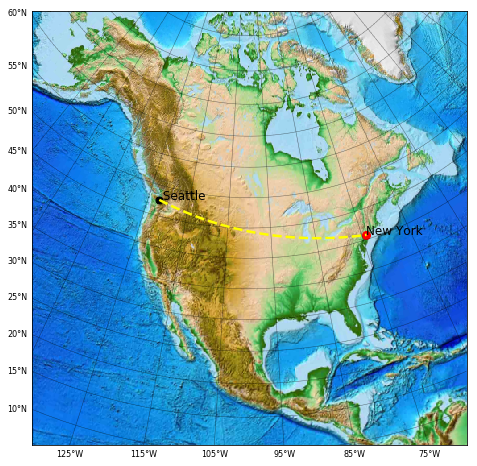

In [134]:
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=1)

x1, y1 = m(-122.3, 47.6)
ny1,ny2=m(-74,40.73)
plt.plot(x1, y1, 'ok', markersize=7)
plt.plot(ny1,ny2,'or',markersize=8)
plt.text(x1, y1, ' Seattle', fontsize=12)
plt.text(ny1,ny2,'New York', fontsize=12)

m.drawmeridians(np.arange(-155,-5,10),\
       labels=[0,0,0,1],fontsize=8,linewidth=0.5)
m.drawparallels(np.arange(0,85,5),\
       labels=[1,0,0,0],fontsize=8,linewidth=0.5)
#Crtam put kojim se kreće avion
lon = np.linspace(-122.3,-74)
lat = np.linspace(47.6,40.73)
p,k = m(lon,lat)
m.plot(p,k, linewidth=2.5, color='yellow',linestyle='--')

In [159]:
brzina=485
start=[20,4,0]
R = 6373.0 #Radijus zemlje potreban pri izračunu 
lat1=radians(47.6)
lon1=radians(-112.3)
lat2=radians(40.73)
lon2=radians(-74)

dlon=lon2-lon1
dlat=lat2-lat1

a=sin(dlat/2)**2 +cos(lat1)*cos(lat2)*sin(dlon/2)**2
c=2*atan2(sqrt(a), sqrt(1-a))

udaljenost=R*c
print("Udaljenost među gradovima je:", udaljenost ,"km")
# Sada potrebno izračunati koliko je vremena potrebno da se pređe da udaljenost 
tm=udaljenost/brzina
print("Vrijeme trajanja leta:",tm)

#Izračunavanje vremenske razlike 
sec=tm*60*60
def preracunavanje(sekunde):
    h=sekunde//(60*60)
    m=(sekunde-h*60*60)//60
    s=sekunde-(h*60*60)-(m*60)
    return [h, m, s]
pre=preracunavanje(sec)

def sumtime(s,e):
    extra=0
    extra=((s[2]+e[2])-(s[2]+e[2])%60)%59
    ss=(s[2]+e[2])%60
    mm=(s[1]+e[1]+extra)%60
    extra=((s[1]+e[1]+extra)-(s[1]+e[1]+extra)%60)%59
    hh=s[0]+e[0]+extra
    return (hh,mm,round(ss))
sumt=sumtime(start,pre)
print("Vrijeme kada zbrojimo sate je: "+str(int(sumt[0]))+':'+str(int(sumt[1]))+':'+str(int(sumt[2])) )
def timeny(sumt):
    return (sumt[0]%24,sumt[1],sumt[2])
tny=timeny(sumt)
print("Vrijeme pri slijetanju u NYC je:"+str(int(tny[0]))+':'+str(int(tny[1]))+':'+str(int(tny[2])) )
#Računanje vremena u drugoj vremenskoj zoni 

def vremzone(dt, tz1, tz2):
    tz1=pytz.timezone(tz1)
    tz2=pytz.timezone(tz2)

    dt=datetime.datetime.strptime(dt,"%H:%M:%S")
    dt=tz1.localize(dt)
    dt=dt.astimezone(tz2)
    dt=dt.strftime("%H:%M:%S")
    return dt

pom=b=str(int(tny[0]))+':'+str(int(tny[1]))+':'+str(int(tny[2]))
landtime=vremzone(str(pom), "America/New_York", "America/Los_Angeles")
print("Vrijeme slijetanja u Seattle-u:",landtime)

Udaljenost među gradovima je: 3115.8301904335285 km
Vrijeme trajanja leta: 6.42439214522377
Vrijeme kada zbrojimo sate je: 26:29:28
Vrijeme pri slijetanju u NYC je:2:29:28
Vrijeme slijetanja u Seattle-u: 23:32:28


## Akceleracija

Akceleracija je vektorska fizikalna veličina kojom opisujemo ubrzanje ili usporenje tijela. Srednja akceleracija je po iznosu jednaka količniku iznosa promjene brzine i vremenskog intervala u kojem je ta promjena postignuta. Mjerna jedinica akceleracije je metar u sekundi na kvadrat ${m / s^2}$.

$$
\begin{eqnarray}
a&=&\frac{v-v_0}{\Delta t}&=&\frac{\Delta v}{\Delta t}\
\end{eqnarray}
$$

## Jednoliko ubrzano i jednoliko usporeno gibanje

Ako se tijelo giba tako da mu se brzina u jednakim vremenskim intervalima <b>povećava</b> za jednak iznos, kažemo da se giba <b>jednoliko ubrzano</b>. 

Ako se tijelo giba tako da mu se brzina u jednakim vremenskim intervalima za jednak iznos <b>smanjuje</b>, kažemo da se giba <b>jednoliko usporeno</b>.

Biciklist vozi početnom brzinom $v_0$. U jednom trenutku počne ubrzavati akceleracijom $a$, te nakon vremena $t$ postigne brzinu $v$. Izraz koji povezuje te veličine je: 
$\begin{eqnarray}
v&=&v_0&+&at
\end{eqnarray} $

<b>Primjer</b>
Uzmimo za primjer tijlo koje se giba konstantnim ubrzanjem od početne brzine $v_0$ do konačne brzine $v_1$. Neka brzina tijela u početnom položaju A iznosi $v_0=0 ms^{-1}$.Traje li to povećanje brzine $5 s$, možemo izračunati ubrzanje 
$$
\begin{eqnarray}
a&=&\frac{v_1-v_0}{t_1-t_0}&=&\frac{20ms^{-1}-1}{5 s}=4 ms^{-1}\
\end{eqnarray}
$$

Iz prijašnjih fomrula imamo izraz za put 

$$
\begin{eqnarray}
s&=&\frac{1}{2}at^{2}\
\end{eqnarray}
$$

S obzirom da je početna brzina iznosila $0ms^{-1}$, nakon $1, 2$ i $3$ sekunde ona ima vrijednost $4ms^{-1}$, $8ms^{-1}$, $12ms^{-1}$ što je prikazano dalje grafovima. 


(23.333333333333332, 105.0)

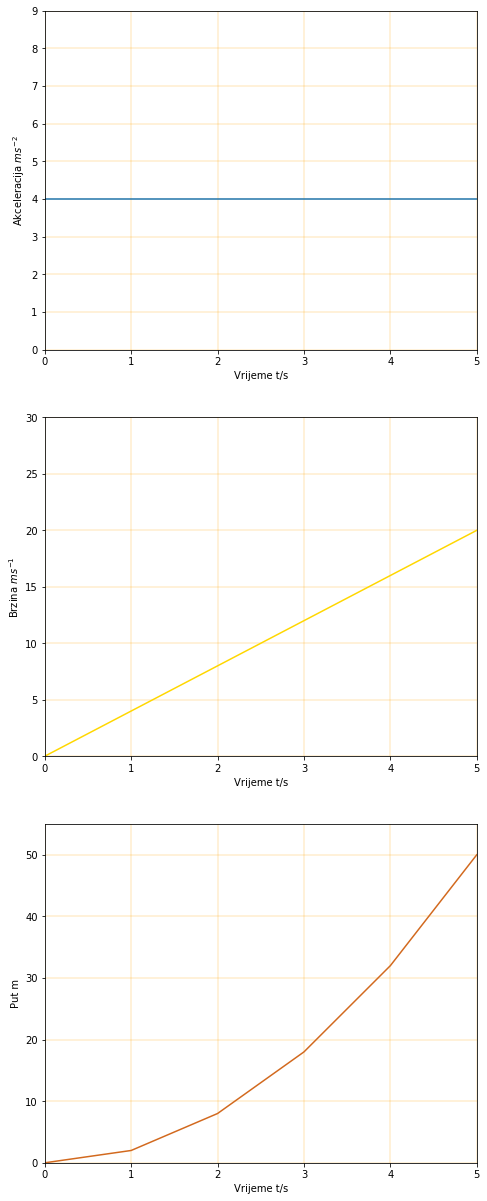

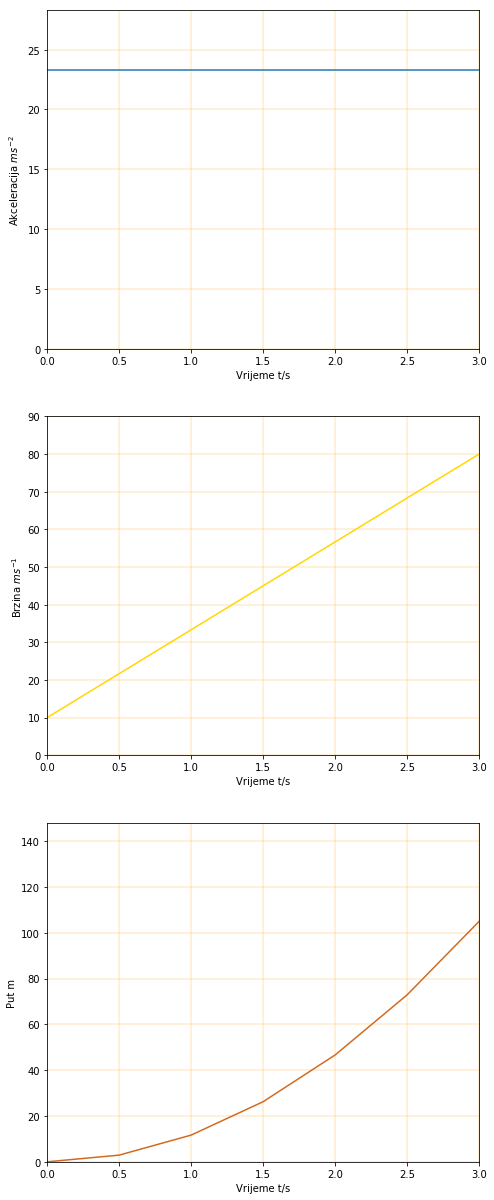

In [136]:
def grafovi(v1,v0,t1,t0,n):
    a=(v1-v0)/(t1)
    s=1/2*a*t1**2
    vrijeme=np.arange(t0,t1+1,(t1-t0)/n)
    aniz=np.repeat(a,len(vrijeme))
    brzina=aniz*vrijeme
    put=1/2*aniz*vrijeme**2
    fig3,(at,vt,st) = plt.subplots(3, 1) 
    fig3.subplots_adjust(left=4, bottom=2, right=5, top=6, wspace=None, hspace=None)
    at.plot(vrijeme,aniz)
    at.set(xlim=(0,t1),ylim=(0,a+5),xlabel="Vrijeme t/s",ylabel="Akceleracija $ms^{-2}$")
    vt.plot(vrijeme,brzina+v0,color='gold')
    vt.set(xlim=(0,t1),ylim=(0,v1+10),xlabel="Vrijeme t/s",ylabel="Brzina $ms^{-1}$")
    st.plot(vrijeme,put,color="chocolate")
    st.set(xlim=(0,t1),ylim=(0,max(put)+5),xlabel="Vrijeme t/s",ylabel="Put m")
    at.grid(linestyle='-',linewidth='0.3',color='orange')
    vt.grid(linestyle='-',linewidth='0.3',color='orange')
    st.grid(linestyle='-',linewidth='0.3',color='orange')
    fig3
    return (a, s)


grafovi(20,0,5,0,5)
grafovi(80,10,3,0,6)

## Slobodni pad
Na tijela blizu Zemlje djeluje Zemljina <b>sila teža</b>. Sila teža proporcionalna je s masom tijela. To znači da Zemlja privlači svako tijelo prema svojemu središtu silom koja je proporcionalna masi tijela, a njezin se iznos računa formulom: 
$\begin{eqnarray}
F&=&mg
\end{eqnarray}$
Akceleracija tijela koju neka sila daje tijelu proporcionalna je sili, a obrnuto proporcionalna masi tijela. Zbog toga je akceleracija svih tijela koja slobodno padaju na Zemlju, uz zanemariv otpor zraka, jednaka. 
$$\begin{eqnarray}
a&=&\frac{F}{m}&=&\frac{mg}{m}&=&g
\end{eqnarray}$$
Zašto se sva tijela blizu Zemlje, ako otpor zraka koji djeluje na njih možemo zanemariti, pri padu jednako ubrzavaju akceleracijom $g=9.81 ms^{-2}$.

Jednoliko ubrzano gibanje tijela ispuštenog bez početne brzine blizu Zemljine površine nazivamo <b>slobodan pad</b>.

# Statistički prikaz odnosa brzine i automobilske nesreće

U 2015 godini tijekom istraživanja na području Amerike $48613$ vozača bila su uključena u automobilsku nesreću gdje je $35092 $ izgubilo život. Osamnaest posto vozača je vozilo preko dopuštene brzine za vrijeme sudara.
Prvi graf pokazuje ukupan broj prometnih nesreća i postotak koji je povezan sa ubrzanom vožnjom tijekom 10 godina. Postotak prekomjerno brze vožnje se tijekom godina povećava.

Text(0, 0.5, 'Postotak nesreća povećane brzine')

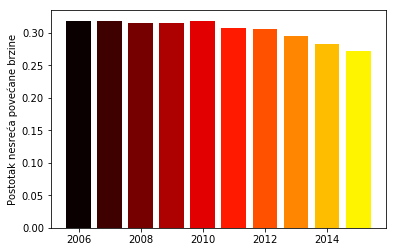

In [137]:
years =np.arange(2006,2016,1)
total=np.array([42708,41259,37423,33883,32999,32479,33782,32893,32744,35092])
gas=np.array([13609,13140,11767,10664,10508,10001,10329,9696,9283,9557])
usage=np.divide(gas,total)

colors = plt.cm.hot(np.linspace(0,8,100))
plt.bar(years, usage,color=colors)
plt.ylabel("Postotak nesreća povećane brzine")

Iz gornjeg grafičkog prikaza uočavamo da se postotak nesreća tijekom godina smanjuje, što je sigurno utjecaj unaprijeđenja i cestovne infrastrukture, ali i auotomobila i zazštite ljudi. Tijekom istraživanja, dani su podaci jedne savezne države po spolu koliko je koji spol utječući prekomjernom brzinom skrivio automobilsku nesreću.

Text(0.5, 1.0, 'Broj nesreća po spolu')

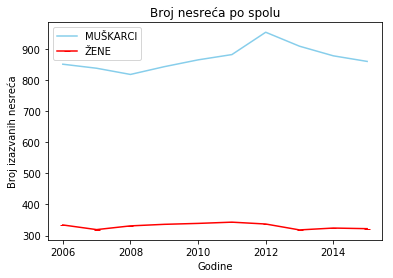

In [139]:
male=np.array([852,839,819,844,866,883,955,910,879,861])
female=np.array([334,319,331,336,339,343,337,318,324,322])

gr=pd.DataFrame({'y':years,'MUŠKARCI':male,'ŽENE':female})

plt.plot('y','MUŠKARCI', data=gr, marker='',color='skyblue')
plt.plot('y','ŽENE', data=gr, marker='_',color='red')
plt.legend()
plt.xlabel('Godine')
plt.ylabel('Broj izazvanih nesreća')
plt.title('Broj nesreća po spolu')

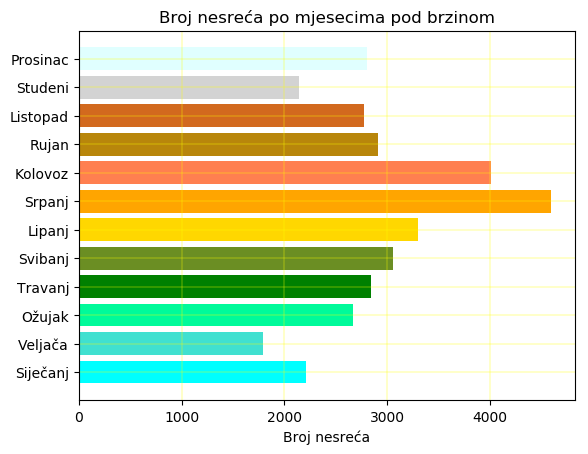

In [143]:
monthnum=np.array([2210, 1789, 2667, 2842, 3052, 3298, 4596, 4007, 2912, 2772, 2140, 2807])
month=np.arange(12)

plt.rcdefaults()
fig, ax = plt.subplots()

# Dijelim mjesece tako da svak mjesec dobije ime i boju kojom ce biti bojan 
def mjesec(broj):
    if(broj==1) :return 'Siječanj','cyan'
    if(broj==2) :return 'Veljača','turquoise'
    if(broj==3) :return 'Ožujak','mediumspringgreen'
    if(broj==4) :return 'Travanj','green'
    if(broj==5) :return 'Svibanj','olivedrab'
    if(broj==6) :return 'Lipanj','gold'
    if(broj==7) :return 'Srpanj','orange'
    if(broj==8) :return 'Kolovoz','coral'
    if(broj==9) :return 'Rujan','darkgoldenrod'
    if(broj==10) :return 'Listopad','chocolate'
    if(broj==11) :return 'Studeni','lightgrey'
    if(broj==12) :return 'Prosinac','lightcyan'
mj=np.array([])
for i in range(12):
    mj=np.append(mj,mjesec(i+1))
mj = np.array(mj).reshape((12, 2))

colors = mj[:,1]
im = mj[:,0]
ax.barh(im, monthnum, align='center',
        color=colors)
ax.set_yticklabels(im)
ax.set_xlabel('Broj nesreća')
ax.set_title('Broj nesreća po mjesecima pod brzinom')
ax.grid(linestyle='-',linewidth='0.3',color='yellow')
plt.show()

Iz histograma je očito da najviše ljudi pogine u srpnju, što je vjerojatno posljedica činjenice da tada najviše ljudi kreće na godišnji odmor. Iako je uvriježeno mišljenje da su zimski mjeseci najopasniji za vozače zbog loših vremenskih uvjeta,snijega, kiše i poledice iznenađujuće je da je najmanja smrtnost u siječnju i veljači.

## Testiranje statističkih hipoteza

Tijekom istraživanja mjeri se neko numeričko ili nenumeričko obilježje koje označavamo s $X$. Rezultat mjerenja obilježja $X$ označavamo s $x$. Slučajni uzorak tada možemo prikazati kao $(X_1,…,X_n)$, gdje je $n$ duljina uzorka, a s $(x_1,…,x_n)$ označiti jednu realizaciju tog uzorka. 

<b>Opažene frekvencije</b> definiramo kao $\ N_j= \sum_{i=1}^{n}{1}_{(X_i=a_i)}$, $j=1,…,k$, pri čemu izraz $1_{(X_i=a_j)}$ poprima vrijednost $1$ ako je $X_i=a_j$, a inače poprima vrijednost $0$, gdje je $a_j$ jedan od rezultata mjerenja obilježja $X$ u uzorku duljine n. 

Broj $\frac{Nj}{n}$ zove se <b>relativna frekvencija</b>. 

<b>Statistička hipoteza</b> je bilo koja pretpostavka o distribuciji obilježja $X$, tj. pretpostavka da $X$ ima sljedeću distribuciju: 
$$
\left(\begin{array}{cc} 
a_1 & a_2 & \dots & a_n\\
p_1(\theta)& p_2(\theta) & \dots & p_n(\theta)
\end{array}\right)
$$ 

pri čemu $\theta$ označava parametre o kojima ta distribucija može ovisiti, $a_1,a_2,…,a_k$ označavaju rezultate mjerenja, a $p_1(\theta),p_2(\theta),…,p_k(\theta)$ vjerojatnosti da će se ti rezultati postići. 


Jedno od prvih pitanja koje nam se nametnulo pri proučavanju podataka jest jesu li spol vozača i njihova dob zavisna obilježja, tj. možemo li, s određenom sigurnošću, zaključiti da žene, odnosno muškarci imaju jednaku vjerojatnost pogibije u određenoj dobi. Možda naizgled ovo izgleda kao trivijalno, gotovo nevažno pitanje, no u statistici nas odgovori često mogu iznenaditi te ništa ne treba uzimati "zdravo za gotovo". Promatramo dva različita obilježja $X$ i $Y$. Neka je:
- duljina uzorka
- broj različitih vrijednosti koje poprima obilježje X,
- c broj različitih vrijednosti koje poprima obilježje Y.
$\chi^2 $-test nezavisnosti je statistički test kojim se testiraju hipoteze 
$$
H_0:\; X\; i\; Y su \;nezavisna\; obilježja
\\
H_1:\; X\; i\; Y su \:zavisna\; obilježja
$$


$\chi^2 $-testom nezavisnosti koristimo se za testiranje sljedećih hipoteza: 
$$
H_0: Spol\; i\; dobna\; skupina\; su\; nezavisna\; obilježja
\\
H_1: Spol\; i\; dobna\; skupina\; nisu\; nezavisna\; obilježja
$$
 
Na temelju dobivenih postotaka za određene skupine, navedenim kodom na slučajan način smo odabrali broj muškaraca i žena podijeljenih u skupine po dobi. 

In [148]:
dobnaskupina = np.random.choice(a= ["20-29","30-39","40-49","50-59"],
                              p = [0.40, 0.23 ,0.20, 0.17],
                              size=1000)

# Sample data randomly at fixed probabilities
spolnaskupina = np.random.choice(a= ["Muškarci","Žene"],
                              p = [0.86, 0.14],
                              size=1000)

skupina = pd.DataFrame({"Dob":dobnaskupina, 
                       "Spol":spolnaskupina})

skupina_tab = pd.crosstab(skupina.Dob, skupina.Spol, margins = True)

skupina_tab.columns = ["Muškarci","Žene","Ukupnos"]

skupina_tab.index = ["20-29","30-39","40-49","50-59","UKUPNO"]
observed = skupina_tab.iloc[0:4,0:2]  
observed

print("p-vrijednost testa je:",stats.chi2_contingency(observed=observed)[1])

p-vrijednost testa je: 0.15773904564846364


Rješavanjem problema ovisnosti smrtnosti u pojedinoj dobnoj skupini o spolu, $\chi^2 $-testom dobili smo da je p-vrijednost velika, do na slučajnog odabira podataka, ali na razini značajnosti $5 \%$ ne odbacujemo $H_0$, odnosno smrtnost u dobnim skupinama ne ovisi o spolu pa muškarci/žene imaju jednaku vjerojatnost da poginu u bilo kojoj starosnoj dobi.

### Očekivana dob vozača u trenutku nesreće 

Pitanje koje se prirodno nameće je očekivana dob u trenutku nesreće. Točnije, zanima nas možemo li pronaći neki interval godina vozača u kojem je vjerojatnost nesreće najveća. U statistici takav interval nazivamo <b>aproksimativni pouzdani interval</b>. 

Prema CGT slijedi da za dovoljno velike $n$ vrijedi $Z=\frac{\bar{X_n}-\mu}{\sigma}\sqrt{n}$ dolazi iz $N(0,1)$.
Po formuli za vjerojatnost vrijedi:$\mathrm{P}(|z|\le z_{\frac{\alpha}{2}})$
Time je dan interval fomrulom 
$$[\bar{X_n}-z_{\frac{\alpha}{2}}\frac{S_n}{\sqrt{n}}, \bar{X_n}+z_{\frac{\alpha}{2}}\frac{S_n}{\sqrt{n}}]$$
gdje je 
- $n$ duljina uzorka 
- $x_i$ godina života $i$-te osobe u trenutku nesreće 
- $\bar{X_n}=\frac{\sum_{i=1}^{n} x_i}{n}$
- $S_n^2=\frac{1}{n-1}\sum_{i=1}^{n} {(x_i-\bar{X_n})}^2$
a broj $z_\frac{\alpha}{2}$ čitamo iz tablice standardne normalne distribucije. U našem uzorku imamo $n=1000$

In [161]:
b=1000
dob1=np.random.uniform(20,29,400)
dob2=np.random.uniform(30,39,230)
dob3=np.random.uniform(40,49,200)
dob4=np.random.uniform(50,59,170)
dob=np.concatenate([dob1,dob2,dob3,dob4])
dob=np.round(dob)
zapol=1.96 # za alfa 5%
asrd=np.mean(dob)
suma=(dob-asrd)**2
Skv=(1/(b-1))*(np.sum(suma))

def interval(n,asr,z,Skv):
    lijevi=asr-z*(np.sqrt(Skv/n))
    desni=asr+z*(np.sqrt(Skv/n))
    return(lijevi,desni)
print("Pouzdani 95% interval je:",interval(b,asrd,zapol,Skv))

Pouzdani 95% interval je: (35.304256673815566, 36.725743326184435)


Dakle, aproksimativni $95 \%$ pouzdani interval za očekivanu dob u trenutku pogibije je oko [$35.06,36.49$] pa zaključujemo da je očekivana dob između 35 i 37 godina. Postotak po dobnim skupinama možemo također prikazati dijagramom.

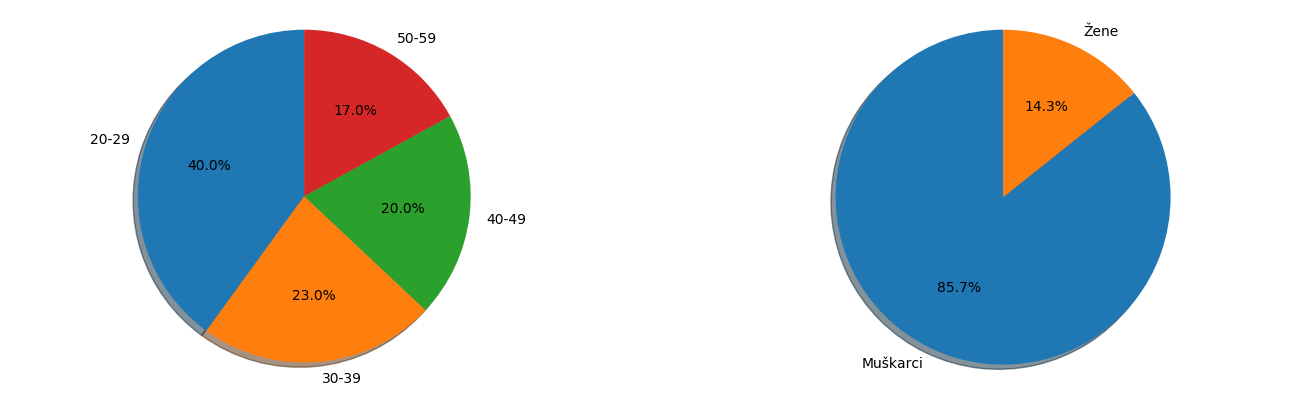

In [162]:
labels = '20-29', '30-39', '40-49', '50-59'
sizes = [len(dob1)/b, len(dob2)/b, len(dob3)/b, len(dob4)/b]

fig1, (ax1,ax2) = plt.subplots(1,2)
fig1.subplots_adjust(left=4, bottom=None, right=6, top=None, wspace=None, hspace=None)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
def frek(niz):
    bm=0
    bz=0
    for i in range(len(spolnaskupina)):
        if(spolnaskupina[i]=='Muškarci'):
            bm=bm+1
        elif(spolnaskupina[i]=='Žene'):
            bz=bz+1
    return (bm,bz)
labels2='Muškarci', 'Žene'
sizes=[bm/b,bz/b]
ax2.pie(sizes, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

Iz dijagrama slijedi da najviše poginulih ima u dobnoj skupini od $20$ do $29$. Također možemo primijetiti da se broj poginulih smanjuje po dobnim skupinama, što govori da su stariji vozači oprezniji od onih u srednjim godinama, a oni u dobi od $20$ do $29$ najrizičnija su skupina. 
Iako se za žene govori da su lošiji vozači od muškaraca, sa strukturnog dijagrama po spolu vidimo da pogine gotovo $6$ puta više muškaraca nego žena. 

In [163]:
widgets.Dropdown(
    options=['Vozač i vozim oprezno', 'Vozač i kad pijem, ne vozim!','Nevozač',
             'Vozač i kad vozim, ne pijem!', 'Vozač i ne vozim po propisima','Vozač i obožavam propise'],
    value='Vozač i vozim oprezno',
    description='Ja sam:',
    disabled=False,
)

Dropdown(description='Ja sam:', options=('Vozač i vozim oprezno', 'Vozač i kad pijem, ne vozim!', 'Nevozač', '…